# Using Table from datascience to examine US Census Data

In [23]:
from datascience import *


%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [24]:

data = 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2020/national/asrh/nc-est2020-agesex-res.csv'

# A local copy can be accessed here in case census.gov moves the file:
# data = path_data + 'nc-est2015-agesex-res.csv'

full_census_table = Table.read_table(data)
full_census_table

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
0,5,4056858,4056872,4064653,4087770,4132349,4123745,4007123,4020489,4038022,4007233,4012789,4032231,4054336
0,6,4066381,4066412,4073031,4075153,4097860,4142923,4135738,4020428,4034969,4052428,4019106,4022432,4040169
0,7,4030579,4030594,4043100,4083399,4085255,4108453,4154947,4148711,4034355,4048430,4063647,4027876,4029753
0,8,4046486,4046497,4025624,4053313,4093553,4096033,4120476,4167765,4162142,4047130,4059209,4071894,4034785
0,9,4148353,4148369,4125413,4035854,4063662,4104437,4107986,4133426,4181069,4175085,4058207,4067320,4078668


In [5]:
partial_census_table = full_census_table.select('SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020')
partial_census_table

SEX,AGE,POPESTIMATE2010,POPESTIMATE2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


In [26]:
3*partial_census_table.column("AGE")

array([   0,    3,    6,    9,   12,   15,   18,   21,   24,   27,   30,
         33,   36,   39,   42,   45,   48,   51,   54,   57,   60,   63,
         66,   69,   72,   75,   78,   81,   84,   87,   90,   93,   96,
         99,  102,  105,  108,  111,  114,  117,  120,  123,  126,  129,
        132,  135,  138,  141,  144,  147,  150,  153,  156,  159,  162,
        165,  168,  171,  174,  177,  180,  183,  186,  189,  192,  195,
        198,  201,  204,  207,  210,  213,  216,  219,  222,  225,  228,
        231,  234,  237,  240,  243,  246,  249,  252,  255,  258,  261,
        264,  267,  270,  273,  276,  279,  282,  285,  288,  291,  294,
        297,  300, 2997,    0,    3,    6,    9,   12,   15,   18,   21,
         24,   27,   30,   33,   36,   39,   42,   45,   48,   51,   54,
         57,   60,   63,   66,   69,   72,   75,   78,   81,   84,   87,
         90,   93,   96,   99,  102,  105,  108,  111,  114,  117,  120,
        123,  126,  129,  132,  135,  138,  141,  1

In [31]:
us_pop = partial_census_table.relabeled('POPESTIMATE2010', '2010').relabeled('POPESTIMATE2020', '2020').relabeled('SEX','GENDER')
us_pop

GENDER,AGE,2010,2020
0,0,3951495,3735010
0,1,3957904,3773884
0,2,4090799,3853025
0,3,4111869,3921526
0,4,4077511,4017847
0,5,4064653,4054336
0,6,4073031,4040169
0,7,4043100,4029753
0,8,4025624,4034785
0,9,4125413,4078668


### Population Change: Compute new arrays or apply Function

In [28]:
change = us_pop.column('2020') - us_pop.column('2010')
ratio = us_pop.column('2020')/us_pop.column('2010')

census = us_pop.with_columns(
    'Change', change,
    'Percent Change', ratio-1
)
census.set_format('Percent Change', PercentFormatter)

GENDER,AGE,2010,2020,Change,Percent Change
0,0,3951495,3735010,-216485,-5.48%
0,1,3957904,3773884,-184020,-4.65%
0,2,4090799,3853025,-237774,-5.81%
0,3,4111869,3921526,-190343,-4.63%
0,4,4077511,4017847,-59664,-1.46%
0,5,4064653,4054336,-10317,-0.25%
0,6,4073031,4040169,-32862,-0.81%
0,7,4043100,4029753,-13347,-0.33%
0,8,4025624,4034785,9161,0.23%
0,9,4125413,4078668,-46745,-1.13%


In [29]:
def pchange(x1,x2):
    """Percent change computation"""
    ratio = x2/x1
    return ratio-1

In [34]:
census2 = us_pop.with_columns("Percent Change from Function",us_pop.apply(pchange,"2010","2020"))
census2.set_format('Percent Change from Function', PercentFormatter)
census2

GENDER,AGE,2010,2020,Percent Change from Function
0,0,3951495,3735010,-5.48%
0,1,3957904,3773884,-4.65%
0,2,4090799,3853025,-5.81%
0,3,4111869,3921526,-4.63%
0,4,4077511,4017847,-1.46%
0,5,4064653,4054336,-0.25%
0,6,4073031,4040169,-0.81%
0,7,4043100,4029753,-0.33%
0,8,4025624,4034785,0.23%
0,9,4125413,4078668,-1.13%


In [12]:
census.set_format(['2010','2020'], NumberFormatter)

GENDER,AGE,2010,2020,Change,Percent Change
0,0,"3,951,495","3,735,010",-216485,-5.48%
0,1,"3,957,904","3,773,884",-184020,-4.65%
0,2,"4,090,799","3,853,025",-237774,-5.81%
0,3,"4,111,869","3,921,526",-190343,-4.63%
0,4,"4,077,511","4,017,847",-59664,-1.46%
0,5,"4,064,653","4,054,336",-10317,-0.25%
0,6,"4,073,031","4,040,169",-32862,-0.81%
0,7,"4,043,100","4,029,753",-13347,-0.33%
0,8,"4,025,624","4,034,785",9161,0.23%
0,9,"4,125,413","4,078,668",-46745,-1.13%


In [14]:
census.where(1,are.below(99)).sort('SEX', descending=True)

SEX,AGE,2010,2020,Change,Percent Change
2,0,1932979,1826869,-106110,-5.49%
2,1,1937584,1847230,-90354,-4.66%
2,2,2002157,1884480,-117677,-5.88%
2,3,2010632,1916691,-93941,-4.67%
2,4,1993216,1964865,-28351,-1.42%
2,5,1988101,1981945,-6156,-0.31%
2,6,1993604,1972968,-20636,-1.04%
2,7,1979937,1970498,-9439,-0.48%
2,8,1971169,1972830,1661,0.08%
2,9,2018387,1992717,-25670,-1.27%


In [35]:
selection = census.where(1,are.below(99)).select("GENDER","AGE","Percent Change")
selection

GENDER,AGE,Percent Change
0,0,-5.48%
0,1,-4.65%
0,2,-5.81%
0,3,-4.63%
0,4,-1.46%
0,5,-0.25%
0,6,-0.81%
0,7,-0.33%
0,8,0.23%
0,9,-1.13%


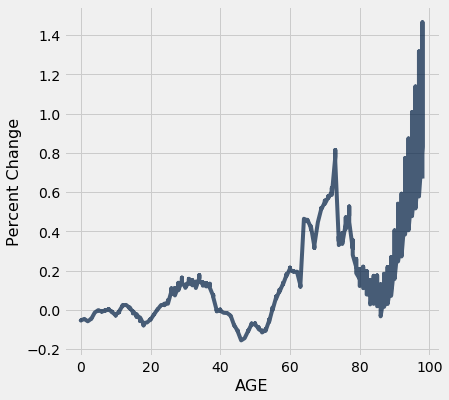

In [36]:
selection.plot("AGE","Percent Change")

In [21]:
selection = census.where(1,are.below(99)).where("GENDER",0).select("AGE","2010","2020")
selection

AGE,2010,2020
0,"3,951,495","3,735,010"
1,"3,957,904","3,773,884"
2,"4,090,799","3,853,025"
3,"4,111,869","3,921,526"
4,"4,077,511","4,017,847"
5,"4,064,653","4,054,336"
6,"4,073,031","4,040,169"
7,"4,043,100","4,029,753"
8,"4,025,624","4,034,785"
9,"4,125,413","4,078,668"


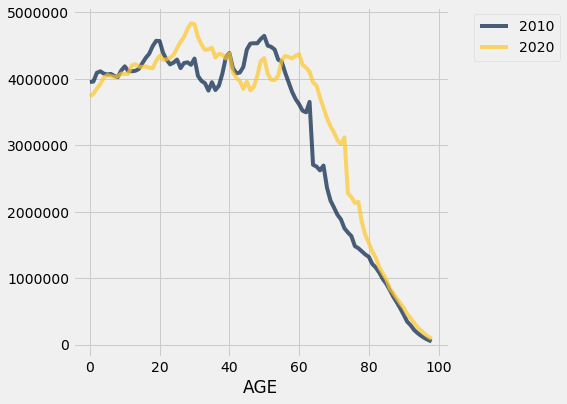

In [22]:
selection.plot("AGE")

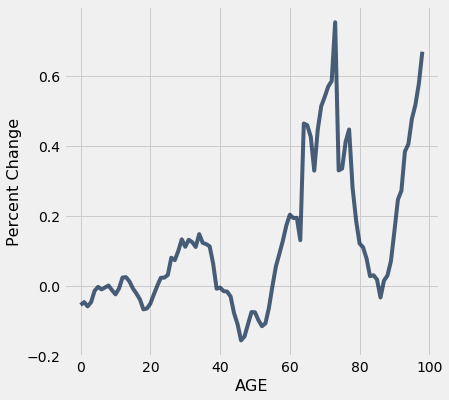

In [20]:
census.sort('Change', descending=False).where(0,are.equal_to(2)).where(1,are.below(99)).plot(1,'Percent Change',0)

In [30]:
census.select(0,1,2,3).where('AGE',are.equal_to(73))

SEX,AGE,2010,2020
0,73,1750230,3117385
1,73,794611,1442000
2,73,955619,1675385


In [ ]:
census.select(0,1,2,3).where('AGE',are.equal_to(73)).barh()

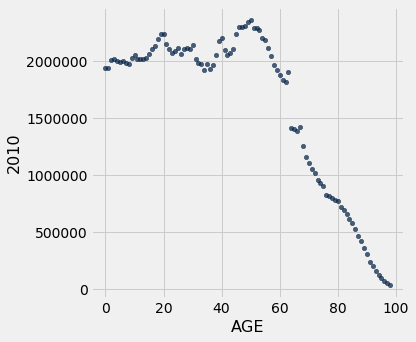

In [36]:
census.select(0,1,2,3).where('SEX',are.equal_to(2)).where('AGE',are.below(99)).scatter(1,2)

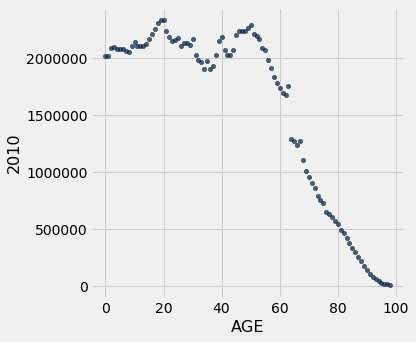

In [37]:
census.select(0,1,2,3).where('SEX',are.equal_to(1)).where('AGE',are.below(99)).scatter(1,2)

In [52]:
us_pop.where(0,1)

SEX,AGE,2010,2020
1,0,2018516,1908141
1,1,2020320,1926654
1,2,2088642,1968545
1,3,2101237,2004835
1,4,2084295,2052982
1,5,2076552,2072391
1,6,2079427,2067201
1,7,2063163,2059255
1,8,2054455,2061955
1,9,2107026,2085951


###### Now explore a new question... perhaps ratio of genders at each AGE or difference between 2010 and 2020 for each AGE.